<a href="https://colab.research.google.com/github/8251960997/8251960997/blob/main/Applied_Statistics_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1 - Basic Cleanup:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/Superstore Marketing Data - Sheet1.csv')

# infomation of dataset
print(df.info())

# Handling missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

df = df.fillna(df.mean())

# Save cleaned dataset
df.to_csv('cleaned_dataset.csv', index=False)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

<ipython-input-15-4f586bdee8be>:16: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


# Task 2 - Descriptive Statistics:

<ipython-input-18-c9abef4e2d8b>:5: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median_values = df.median()
<ipython-input-18-c9abef4e2d8b>:6: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  variance_values = df.var()
<ipython-input-18-c9abef4e2d8b>:7: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  std_de

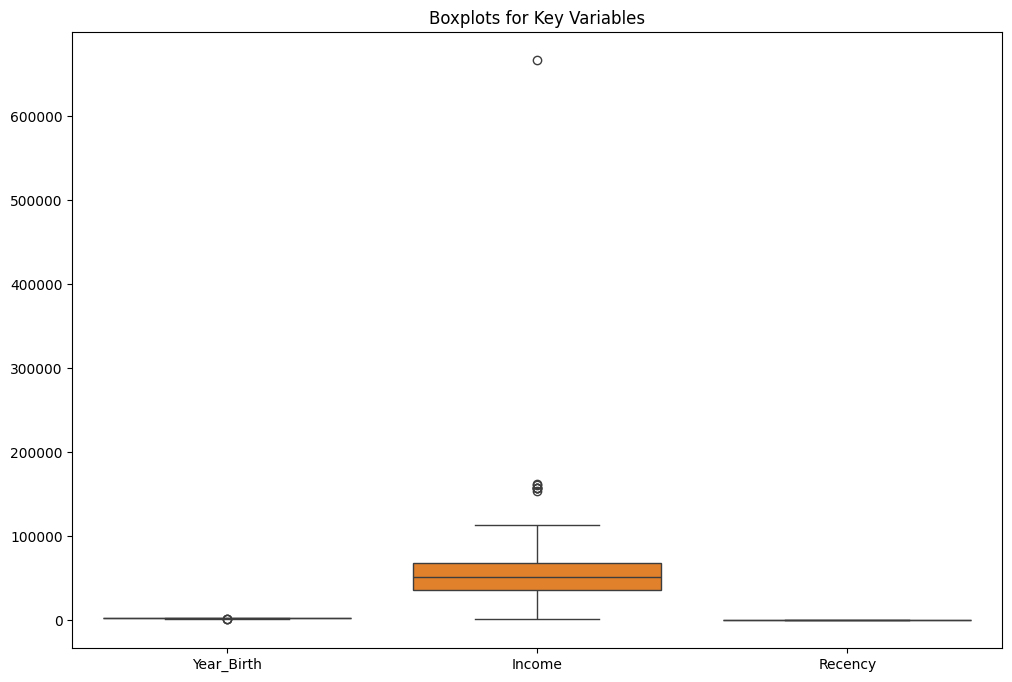

In [ ]:
# show basic statistics
basic_stats = df.describe()

# show median, variance, and standard deviation separately
median_values = df.median()
variance_values = df.var()
std_dev_values = df.std()

# show outliers using boxplots
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['Year_Birth', 'Income', 'Recency']])
plt.title('Boxplots for Key Variables')
plt.show()

# Task 3 - Probability Distributions:

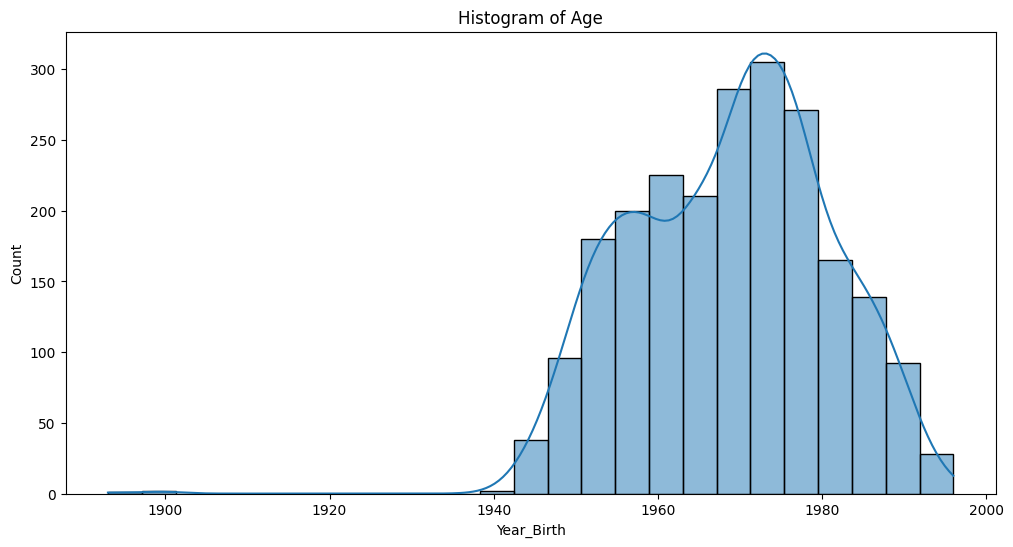

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Year_Birth'], bins= 25, kde=True)
plt.title('Histogram of Age')
plt.show()


# Task 4 - Insights and Customer Segmentation

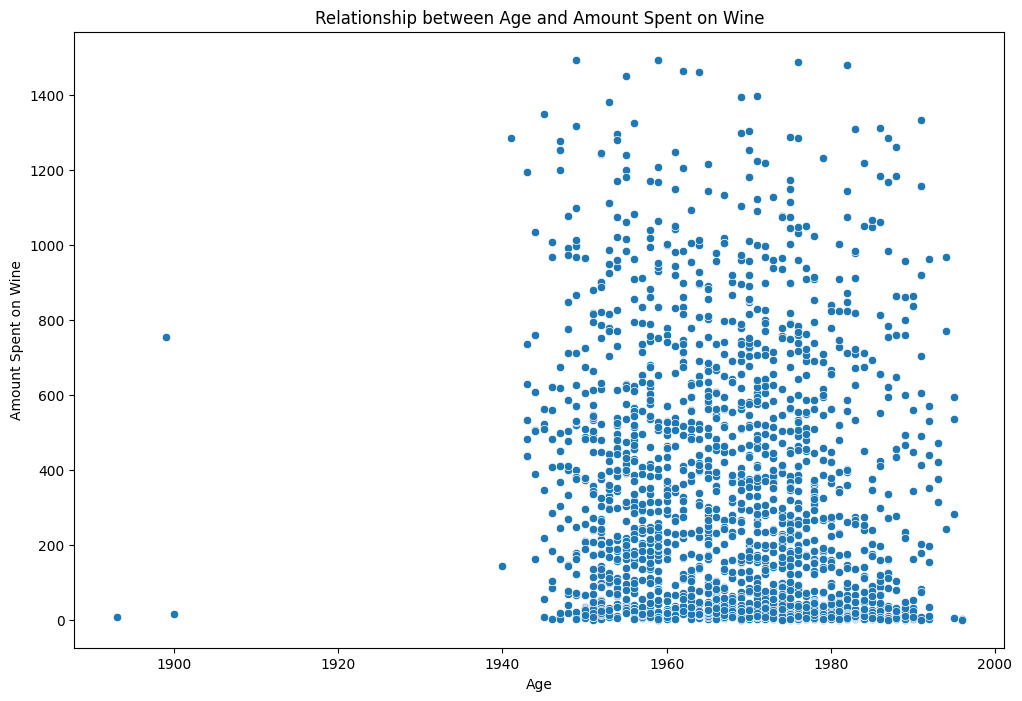

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Year_Birth', y='MntWines', data=df)
plt.title('Relationship between Age and Amount Spent on Wine')
plt.xlabel('Age')
plt.ylabel('Amount Spent on Wine')
plt.show()

# Segment customers based on behaviors
from sklearn.cluster import KMeans

# Select relevant features for segmentation
features_for_segmentation = df[['MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts', 'MntWines', 'MntGoldProds']]

# Use K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['Segment'] = kmeans.fit_predict(features_for_segmentation)


# Task 5 - Conclusion and Recommendations

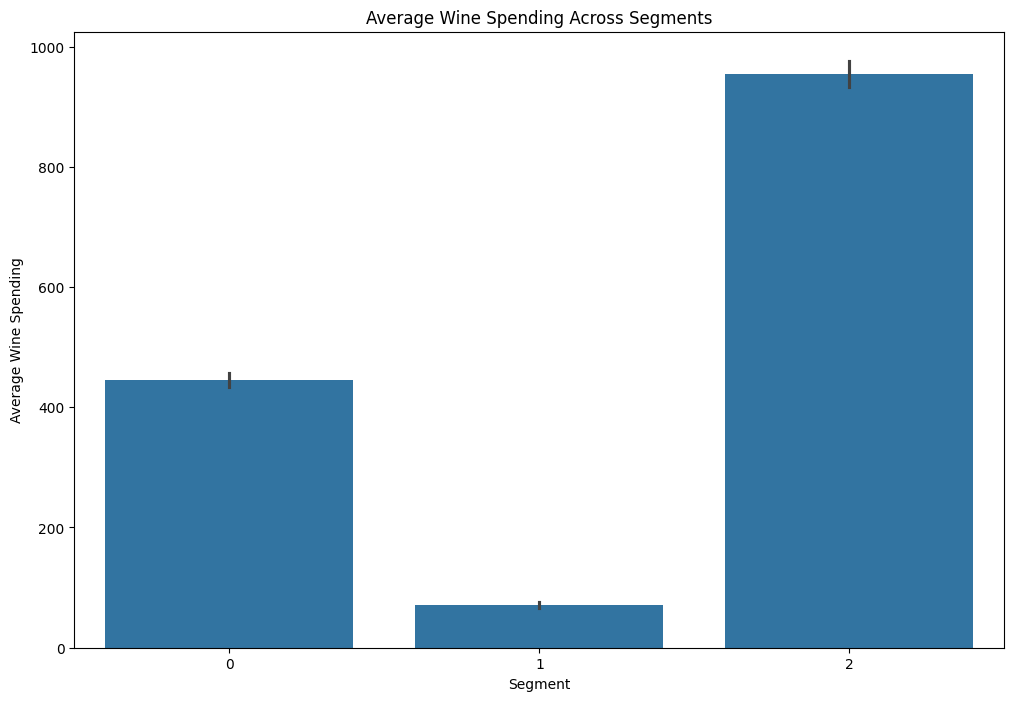

In [ ]:
# Create clear visualizations to showcase your findings
plt.figure(figsize=(12, 8))
sns.barplot(x='Segment', y='MntWines', data=df)
plt.title('Average Wine Spending Across Segments')
plt.xlabel('Segment')
plt.ylabel('Average Wine Spending')
plt.show()

# Save the final dataset with segments
df.to_csv('final_dataset.csv', index=False)